# Proyecto: Análisis de mercado inmobiliario

El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

    1.Detección y eliminación de Outliers

    2.Encoding

    3.Imputación de valores faltantes

    4.Escalado de datos

    5.Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

## PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

 **DESAFÍO OPCIONAL**

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [1]:
#Librerías generales:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy as sp
from IPython.display import display, Markdown

In [2]:
#CLASES A UTILIZAR DE SCIKIT-LEARN

#Preprocesamiento:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer

#Modelos de machine learning:

#Aprendizaje supervisado
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#Aprendizaje no supervisado
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import TruncatedSVD, PCA

#Selección de modelos:

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

#Métricas para evaluación de modelos:

from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, explained_variance_score, max_error

#Ignorar advertencias:

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Cargo dataset:

datos_properati = pd.read_csv('C:/Users/guido/Downloads/DS_Proyecto_01_Datos_Properati.csv')

#Cantidad de filas y columnas:

display(Markdown('##### El dataset tiene `' + str(datos_properati.shape[0]) + '`instancias (muestras) y `' + str(datos_properati.shape[1]) + '`columnas (variables).'))

##### El dataset tiene `146660`instancias (muestras) y `19`columnas (variables).

In [4]:
from pandas_profiling import ProfileReport

In [5]:
reporte = ProfileReport(datos_properati)

In [6]:
reporte.to_file("reporte_datos_properati.html")

In [7]:
#Reporte para análisis exploratorio de datos (EDA):

reporte.to_widgets()

In [8]:
#Reporte para análisis exploratorio de datos (EDA):

import sweetviz as sv
reporte_2 = sv.analyze(datos_properati)
reporte_2.show_html('reporte_2_datos_properati.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)


Creating Associations graph... DONE!
Report reporte_2_datos_properati.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [9]:
display(Markdown('##### A continuación, las primeras 5 instancias del conjunto de datos:'))
datos_properati.head()

##### A continuación, las primeras 5 instancias del conjunto de datos:

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [10]:
datos_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [11]:
display(Markdown('##### ¿Qué columnas incluye el dataset?'))
display(pd.DataFrame(datos_properati.columns, columns=['Columnas'], index=np.arange(1,20))) 

##### ¿Qué columnas incluye el dataset?

,Columnas
1,start_date
2,end_date
3,created_on
4,lat
5,lon
6,l1
7,l2
8,l3
9,rooms
10,bedrooms


In [12]:
display(Markdown('##### ¿Cuáles son las columnas con variables numéricas?'))
display(pd.DataFrame(datos_properati._get_numeric_data().columns, columns=['Columnas numéricas'], index=np.arange(1,9)))

##### ¿Cuáles son las columnas con variables numéricas?

,Columnas numéricas
1,lat
2,lon
3,rooms
4,bedrooms
5,bathrooms
6,surface_total
7,surface_covered
8,price


In [13]:
display(Markdown('##### Primer pantallazo de los datos numéricos:'))
datos_properati.describe()

##### Primer pantallazo de los datos numéricos:

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [14]:
display(Markdown('##### Últimos percentiles de las variables numéricas:'))
datos_properati[['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].quantile([0.9,0.95,0.99])

##### Últimos percentiles de las variables numéricas:

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0.90,-34.495633,-58.379772,5.0,3.0,3.0,289.0,180.00,430000.0
0.95,-34.426635,-58.314883,6.0,4.0,3.0,473.0,241.00,620000.0
0.99,-34.390209,-57.955690,7.0,5.0,5.0,1570.0,423.55,1450000.0


## PARTE A - Transformación de Datos

In [15]:
display(Markdown('##### Renombro algunas de las columnas:'))
datos_properati = datos_properati.rename({'l1': 'country', 'l2': 'region', 'l3': 'neighborhood'}, axis=1)
datos_properati.head()

##### Renombro algunas de las columnas:

,start_date,end_date,created_on,lat,lon,country,region,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [16]:
display(Markdown('##### Elimino las columnas que no aportarán valor a mis modelos para avanzar con el preprocesamiento:'))
datos_properati = datos_properati.drop(['start_date','end_date','created_on','title','description'], axis=1)
datos_properati.head()

##### Elimino las columnas que no aportarán valor a mis modelos para avanzar con el preprocesamiento:

,lat,lon,country,region,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,PH,Venta


In [17]:
# Las columnas eliminadas cobrarían otro tipo de relevancia en proyectos de Series de Tiempo 
#('start_date', 'end_date' y 'created_on') o Procesamiento del Lenguaje Natural ('title' y 'description').

In [18]:
display(Markdown('##### Tipos de datos:'))
display(pd.DataFrame(datos_properati.dtypes, columns=['Tipos de datos']))

##### Tipos de datos:

,Tipos de datos
lat,float64
lon,float64
country,object
region,object
neighborhood,object
rooms,float64
bedrooms,float64
bathrooms,float64
surface_total,float64
surface_covered,float64


#### Gráficos de distribución de variables categóricas y numéricas:

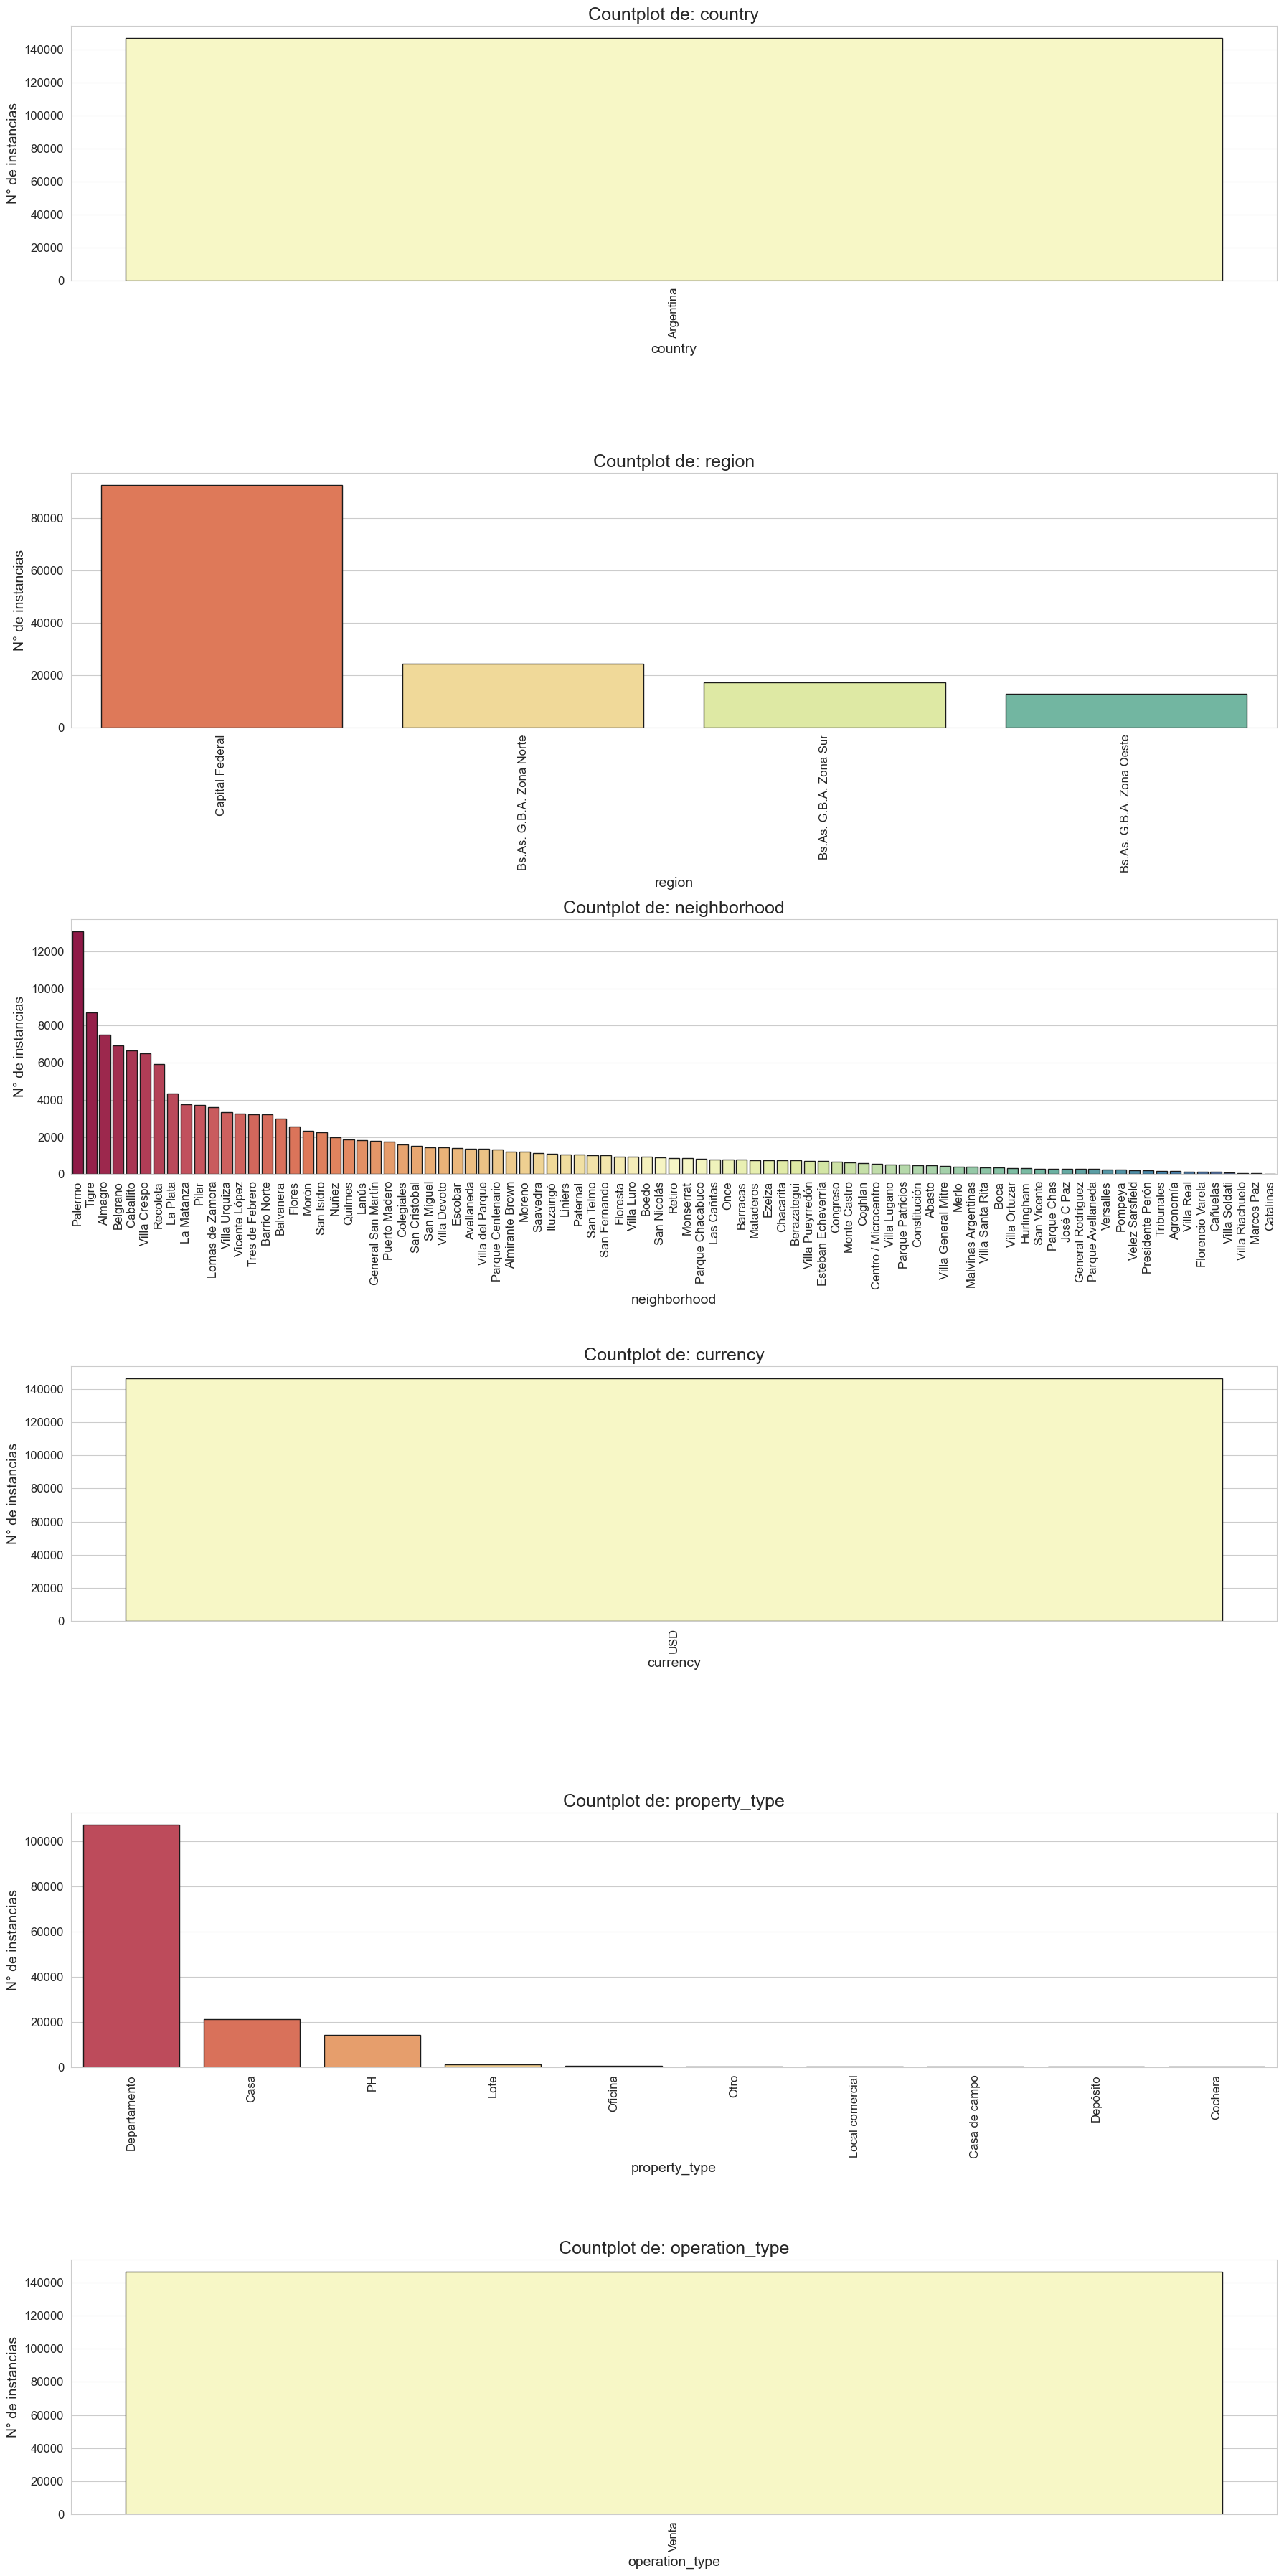

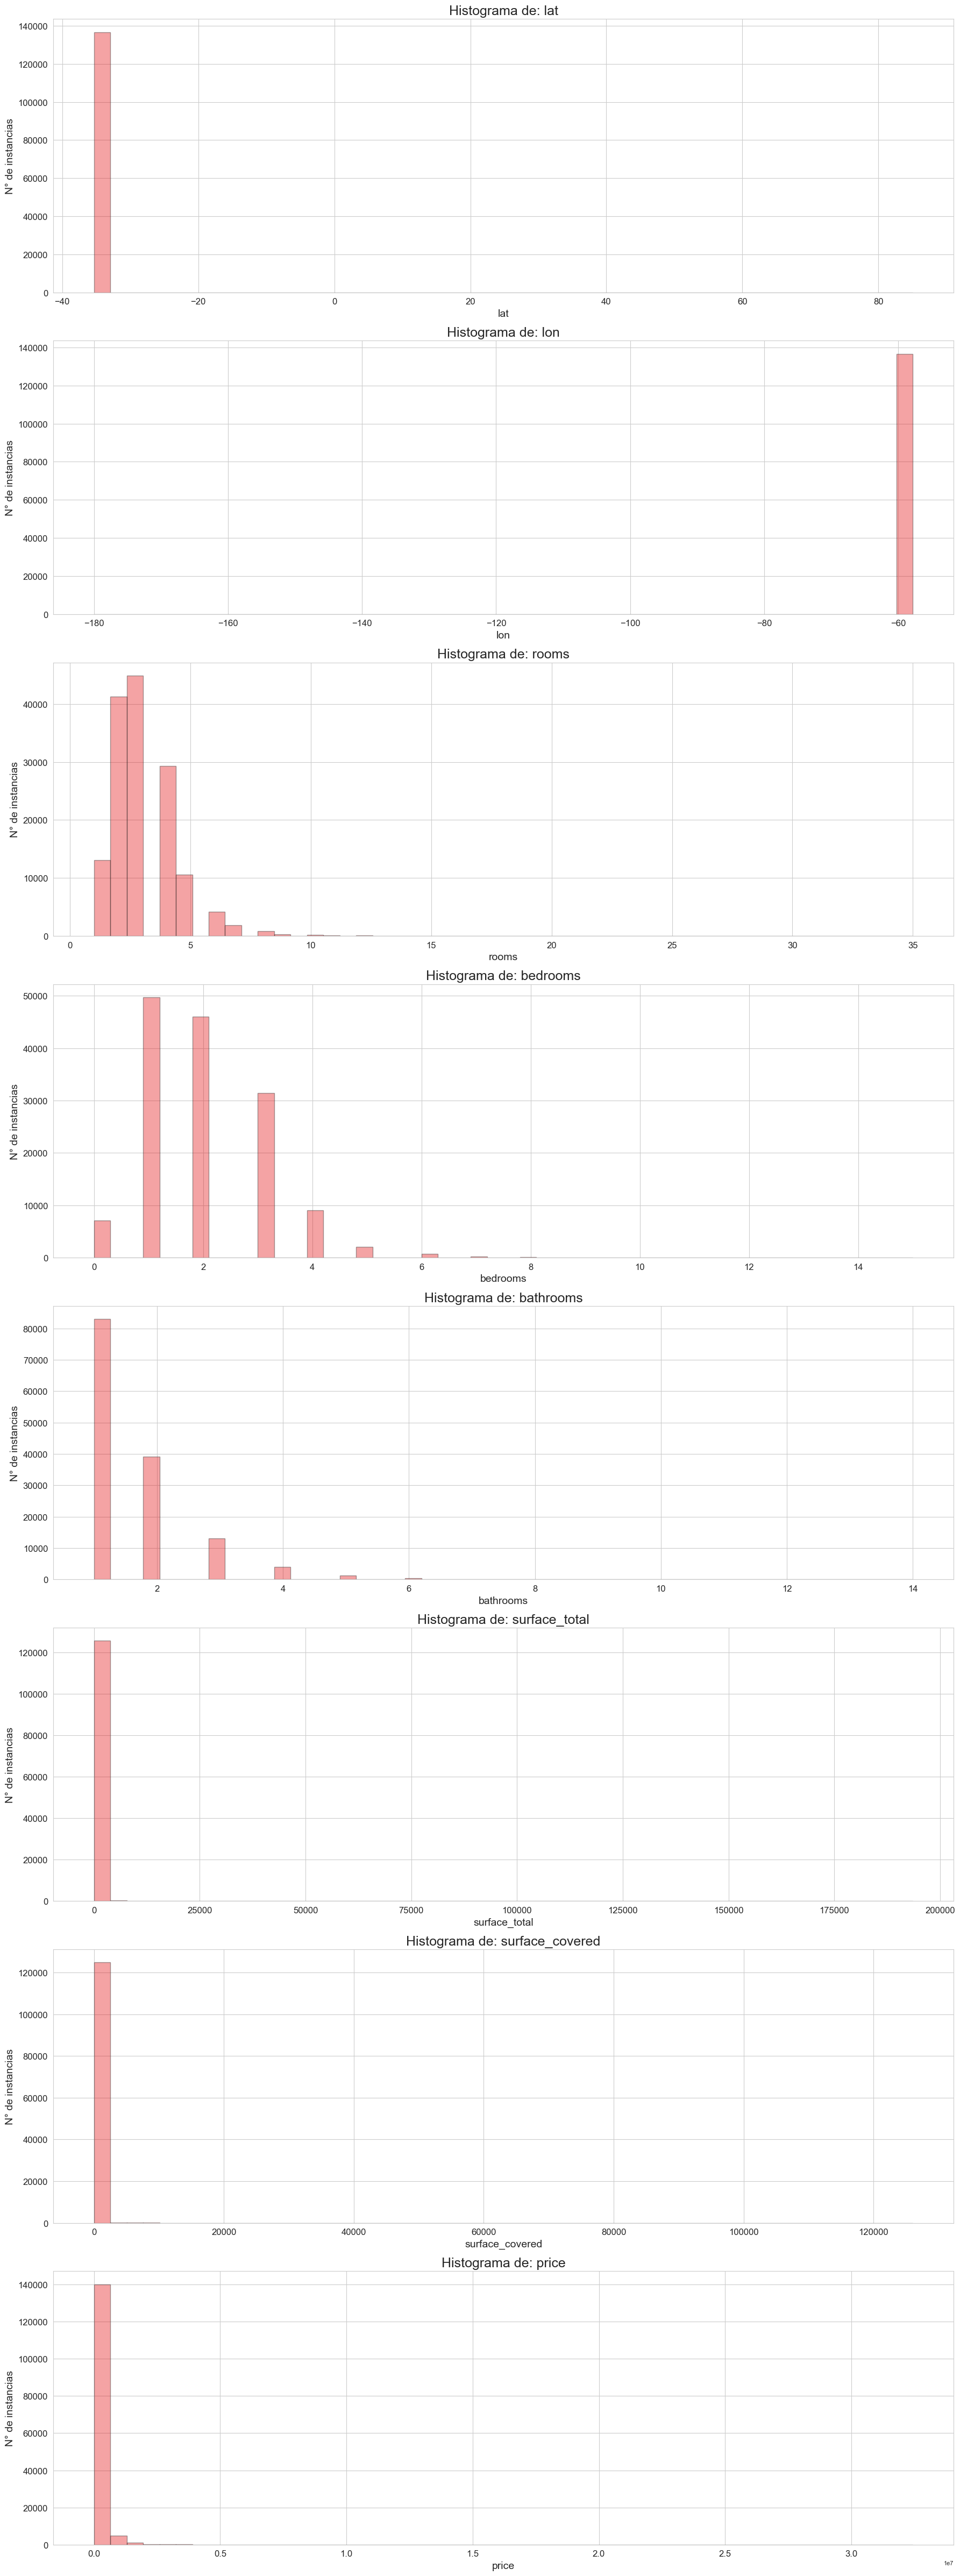

In [19]:
display(Markdown('#### Gráficos de distribución de variables categóricas y numéricas:'))

datos_properati_object = pd.DataFrame(datos_properati.select_dtypes(include = ['object']))

datos_properati_float = pd.DataFrame(datos_properati.select_dtypes(include = ['float64']))

k = 1
j = datos_properati_object.shape[1]
plt.figure(figsize=(18, 6*j))
with sns.axes_style('whitegrid'):
    for i in range(0,j):
        plt.subplot(j, 1, k)
        plt.title('Countplot de: ' + datos_properati_object.columns[i], fontdict = {'fontsize':18})
        sns.countplot(x = datos_properati_object.columns[i], data = datos_properati_object, order = datos_properati_object[datos_properati_object.columns[i]].value_counts().sort_values(ascending = False).index, palette = 'Spectral', edgecolor = 'k')
        plt.xlabel(datos_properati_object.columns[i],fontdict = {'fontsize':14})
        plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
        plt.xticks(rotation = 90)
        plt.tick_params(labelsize = 'large')
        k += 1
    plt.tight_layout()
    plt.show()

    k = 1
    j = datos_properati_float.shape[1]
    plt.figure(figsize=(18, 6*j))
    sns.set_palette('Set1')
    for i in range(0,j):
        plt.subplot(j, 1, k)
        plt.title('Histograma de: ' + datos_properati_float.columns[i], fontdict = {'fontsize':18})
        sns.distplot(datos_properati_float[datos_properati_float.columns[i]], hist_kws = {'edgecolor':'k'}, kde = False)
        plt.xlabel(datos_properati_float.columns[i], fontdict = {'fontsize':14})
        plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
        plt.tick_params(labelsize = 'large')
        k += 1
    plt.tight_layout()
    plt.show()

In [20]:
display(Markdown("##### Distribución 'country':"))
datos_properati['country'].value_counts()

##### Distribución 'country':

Argentina    146660
Name: country, dtype: int64

In [21]:
display(Markdown("##### Distribución 'region':"))
datos_properati['region'].value_counts()

##### Distribución 'region':

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: region, dtype: int64

In [22]:
display(Markdown("##### Distribución 'neighbourhood':"))
datos_properati['neighborhood'].value_counts()

##### Distribución 'neighbourhood':

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: neighborhood, Length: 89, dtype: int64

In [23]:
display(Markdown("##### Distribución 'property_type':"))
datos_properati['property_type'].value_counts()

##### Distribución 'property_type':

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [24]:
#Al igual que en el Proyecto_01, acoto el dataset a las propiedades, de tipo departamento, casa y PH, pertenecientes a Capital Federal:

filtro = np.logical_and(datos_properati.property_type.isin(['Departamento','Casa','PH']),datos_properati.region == 'Capital Federal')
datos_properati = datos_properati[filtro]
datos_properati.shape

(91485, 14)

In [25]:
#Selecciono las variables que me interesan para el desarrollo del trabajo:

datos_properati = datos_properati[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'neighborhood', 'property_type']]
datos_properati.shape

(91485, 8)

### 1.Detección y eliminación de Outliers

In [26]:
#Procedo a lidiar con los valores atípicos (outliers) del dataset:
#Utilizo el método del rango intercuartílico.

def eliminar_outliers(dataset, variable):
    primer_cuartil = np.quantile(dataset[variable], 0.25)
    tercer_cuartil = np.quantile(dataset[variable], 0.75)
    rango_intercuartílico = tercer_cuartil - primer_cuartil
    mínimo_permitido = primer_cuartil - (1.5*rango_intercuartílico)
    máximo_permitido = tercer_cuartil + (1.5*rango_intercuartílico)
    dataset_actualizado = dataset[(dataset[variable] >= mínimo_permitido)]
    dataset_actualizado_2 = dataset_actualizado[(dataset_actualizado[variable] <= máximo_permitido)]
    return dataset_actualizado_2, sns.boxplot(dataset_actualizado_2[variable])

In [27]:
#Gráficos de caja para visualizar valores atípicos en mis 6 variables numéricas:

def gráfico_caja(variable, dataset=datos_properati):
    return sns.boxplot(dataset[variable]), plt.grid(axis='x')

(<matplotlib.axes._subplots.AxesSubplot at 0x19b17ab1310>, None)

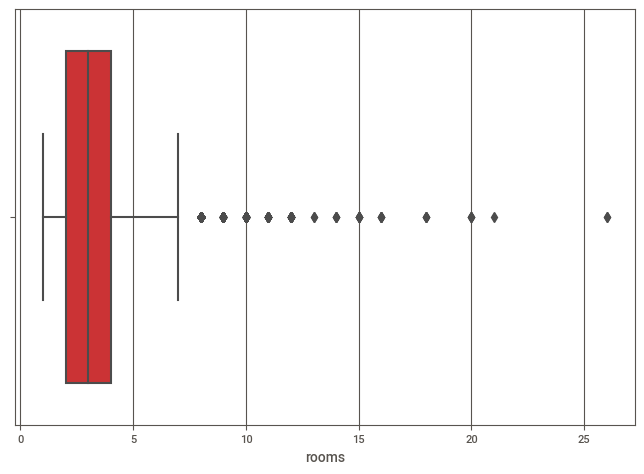

In [28]:
gráfico_caja('rooms')

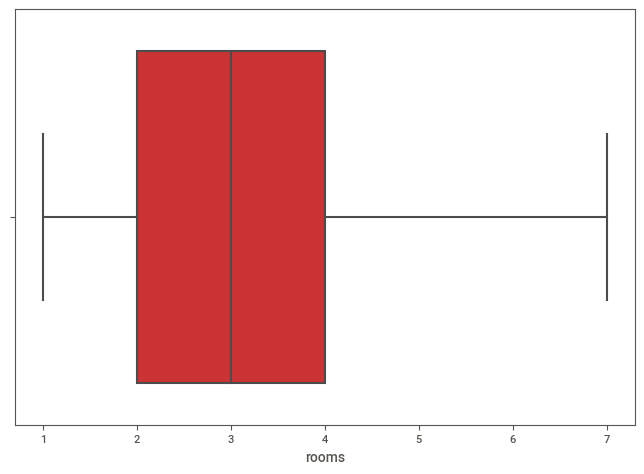

In [29]:
datos_properati, caja_rooms = eliminar_outliers(datos_properati, 'rooms')

(<matplotlib.axes._subplots.AxesSubplot at 0x19b1874dfd0>, None)

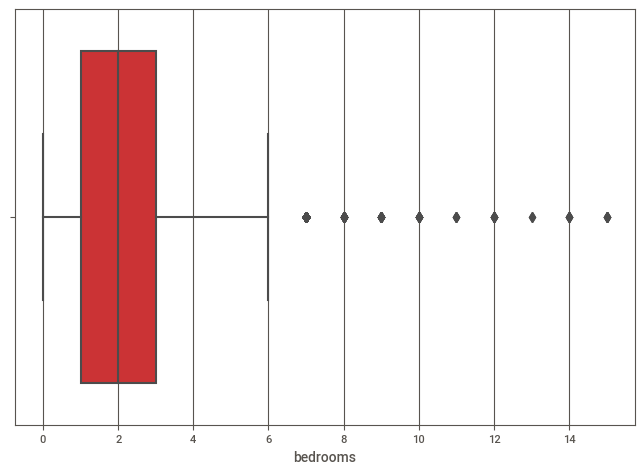

In [30]:
gráfico_caja('bedrooms')

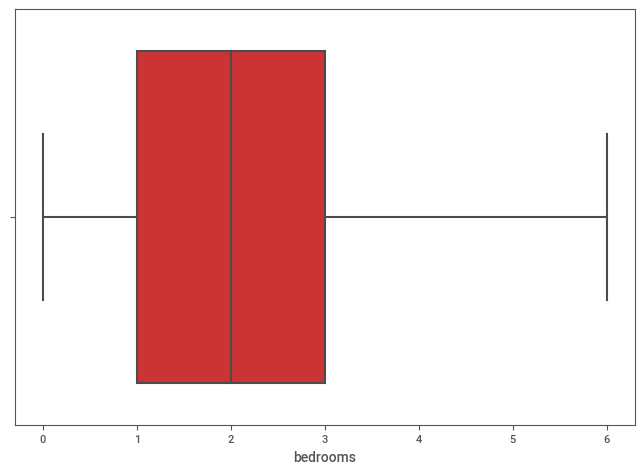

In [31]:
datos_properati, caja_bedrooms = eliminar_outliers(datos_properati, 'bedrooms')

(<matplotlib.axes._subplots.AxesSubplot at 0x19b186a0970>, None)

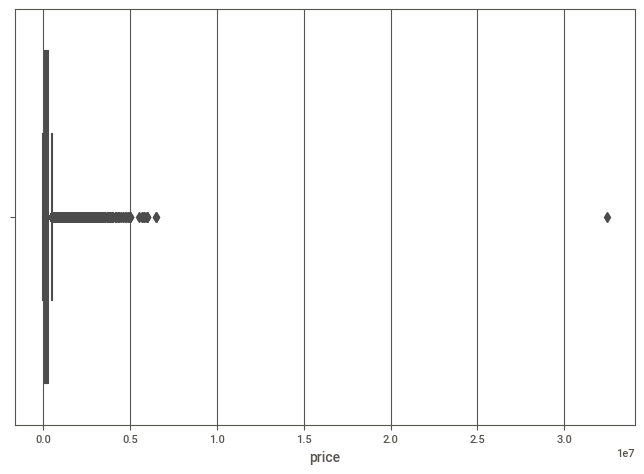

In [32]:
gráfico_caja('price')

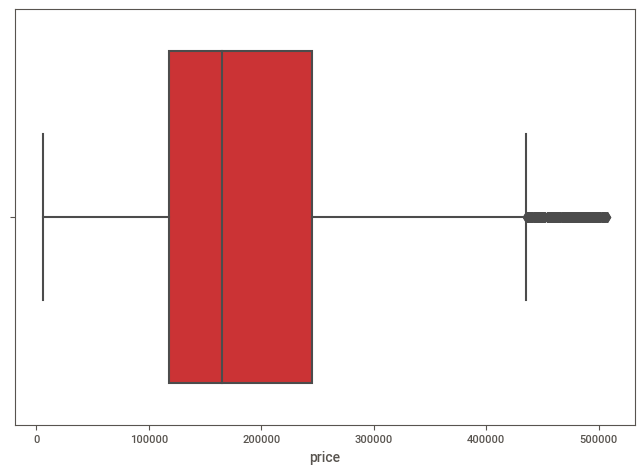

In [33]:
datos_properati, caja_price = eliminar_outliers(datos_properati, 'price')

In [34]:
#Aplico nuevo filtro para que sólo queden aquellas instancias en las que la superficie total es igual o mayor a la superficie cubierta:

datos_properati = datos_properati[datos_properati.surface_total >= datos_properati.surface_covered]
datos_properati.shape

(73877, 8)

In [35]:
#Aplico otro filtro para que sólo queden aquellas instancias en las que la cantidad de 'rooms' es igual o mayor a la de 'bedrooms':

datos_properati = datos_properati[datos_properati.rooms >= datos_properati.bedrooms]
datos_properati.shape

(73824, 8)

(<matplotlib.axes._subplots.AxesSubplot at 0x19b184e1d90>, None)

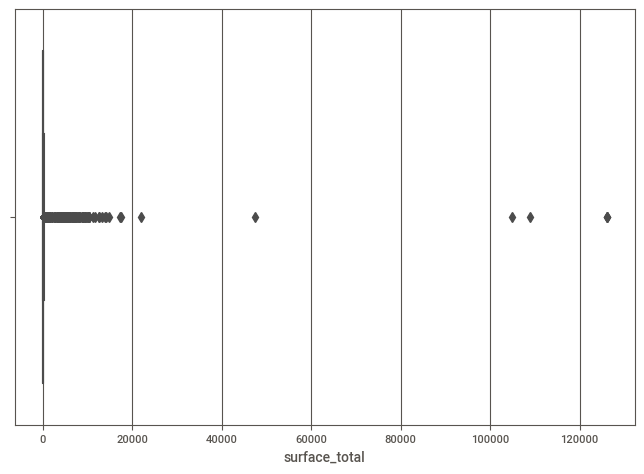

In [36]:
gráfico_caja('surface_total')

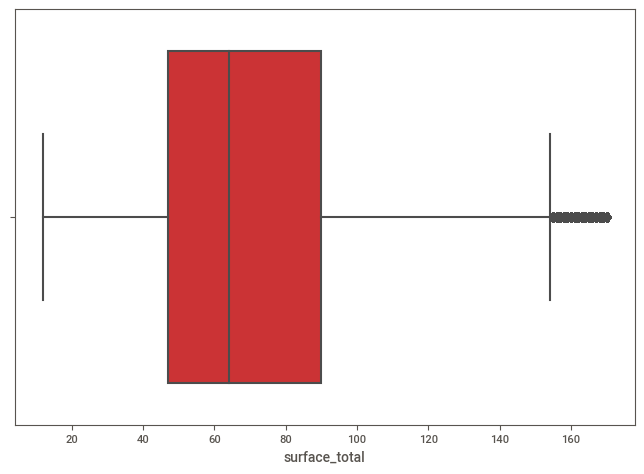

In [37]:
datos_properati, caja_surface_total = eliminar_outliers(datos_properati, 'surface_total')

(<matplotlib.axes._subplots.AxesSubplot at 0x19b17733250>, None)

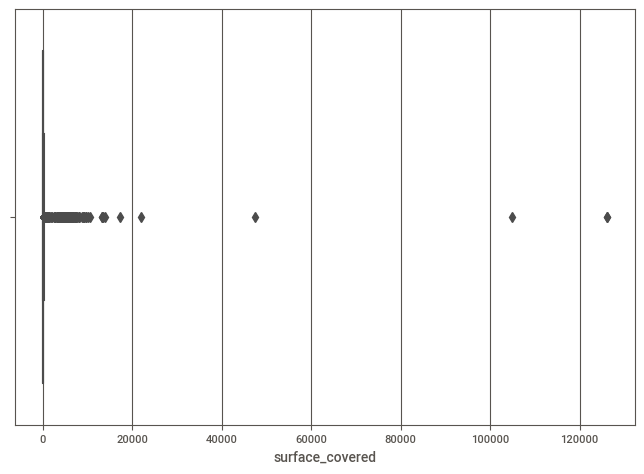

In [38]:
gráfico_caja('surface_covered')

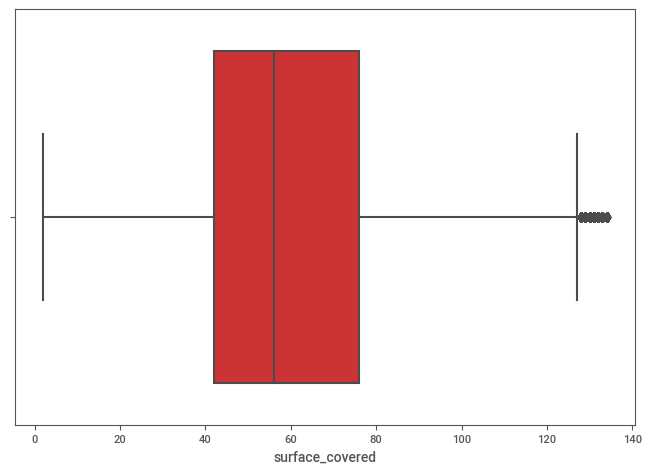

In [39]:
datos_properati, caja_surface_covered = eliminar_outliers(datos_properati, 'surface_covered')

In [40]:
print(datos_properati.shape)
print(datos_properati.describe())

(67836, 8)
              rooms      bedrooms     bathrooms  surface_total  \
count  67836.000000  67836.000000  67131.000000   67836.000000   
mean       2.676249      1.742732      1.331337      69.505572   
std        0.961082      0.809414      0.583540      29.694216   
min        1.000000      0.000000      1.000000      12.000000   
25%        2.000000      1.000000      1.000000      46.000000   
50%        3.000000      2.000000      1.000000      63.000000   
75%        3.000000      2.000000      2.000000      87.000000   
max        7.000000      6.000000     14.000000     170.000000   

       surface_covered          price  
count     67836.000000   67836.000000  
mean         61.470340  181131.748452  
std          24.787411   87231.985310  
min           2.000000    7500.000000  
25%          42.000000  115224.000000  
50%          56.000000  160000.000000  
75%          76.000000  229350.000000  
max         134.000000  506940.000000  


### 2.Encoding

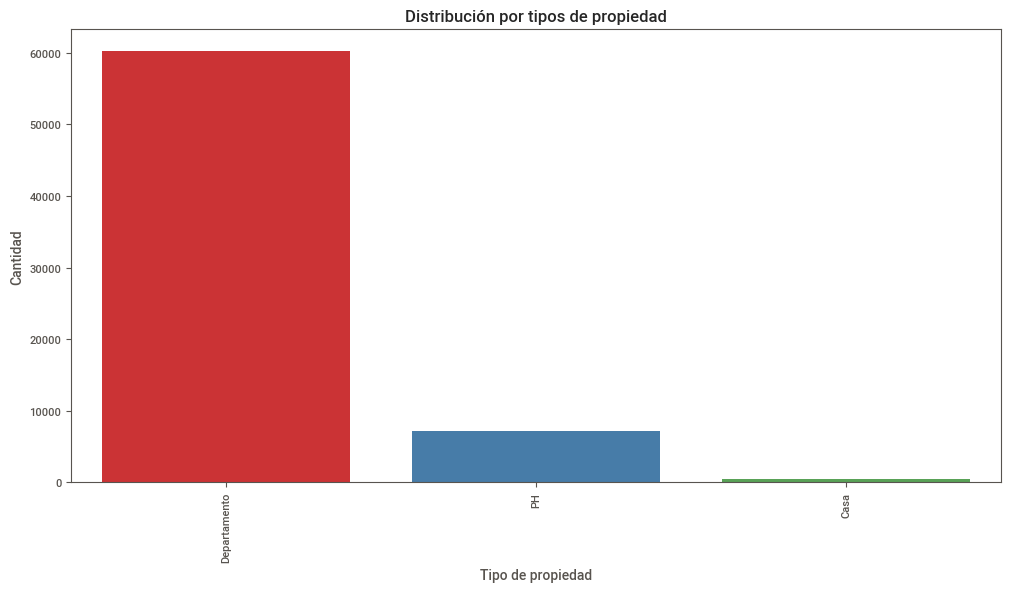

In [41]:
#Distribución de tipos de propiedad:

plt.figure(figsize=(12,6))
ax=sns.countplot(x='property_type',data=datos_properati,order=datos_properati['property_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Tipo de propiedad',fontweight="bold")
plt.ylabel('Cantidad',fontweight="bold")
plt.title('Distribución por tipos de propiedad',fontweight="bold")
plt.show()

In [42]:
datos_properati['property_type'].nunique()

3

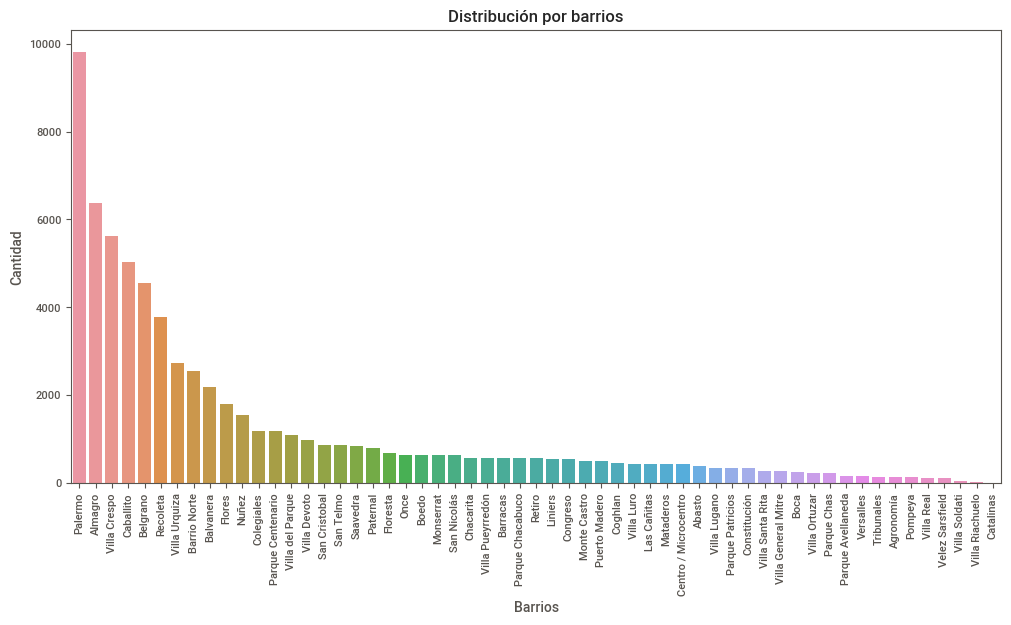

In [43]:
#Distribución de barrios:

plt.figure(figsize=(12,6))
ax=sns.countplot(x='neighborhood',data=datos_properati,order=datos_properati['neighborhood'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Barrios',fontweight="bold")
plt.ylabel('Cantidad',fontweight="bold")
plt.title('Distribución por barrios',fontweight="bold")
plt.show()

In [44]:
datos_properati['neighborhood'].nunique()

57

In [45]:
#Codifico variable "property_type":
datos_properati['property_type'] = datos_properati['property_type'].map({'Departamento':1,'PH':2,'Casa':3})

In [46]:
datos_properati.tail(10)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,neighborhood,property_type
146541,3.0,2.0,2.0,111.0,80.0,400000.0,Palermo,1
146542,2.0,1.0,1.0,80.0,80.0,170000.0,Palermo,1
146543,3.0,2.0,2.0,85.0,81.0,225000.0,Palermo,1
146544,3.0,2.0,2.0,120.0,82.0,430000.0,Palermo,1
146545,3.0,2.0,2.0,88.0,82.0,399000.0,Palermo,1
146546,3.0,2.0,2.0,89.0,82.0,434999.0,Palermo,1
146548,3.0,2.0,2.0,82.0,82.0,475000.0,Palermo,1
146549,3.0,2.0,1.0,84.0,84.0,178000.0,Palermo,2
146550,5.0,2.0,2.0,114.0,95.0,298000.0,Palermo,2
146555,3.0,2.0,2.0,144.0,134.0,480000.0,Palermo,2


In [47]:
datos_properati['property_type'].value_counts()

1    60256
2     7159
3      421
Name: property_type, dtype: int64

In [48]:
#Codifico variable "neighborhood":

encoder = LabelEncoder()
datos_properati['neighborhood'] = encoder.fit_transform(datos_properati['neighborhood'])

In [49]:
datos_properati.head(10)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,neighborhood,property_type
1,2.0,1.0,2.0,70.0,58.0,159000.0,8,2
2,2.0,1.0,1.0,45.0,45.0,125000.0,26,2
3,2.0,1.0,1.0,85.0,50.0,295000.0,26,2
5,2.0,1.0,1.0,56.0,56.0,150000.0,44,2
6,2.0,1.0,1.0,70.0,70.0,159500.0,44,2
7,2.0,1.0,1.0,70.0,70.0,159500.0,44,2
8,1.0,1.0,1.0,45.0,37.0,89000.0,31,2
9,1.0,1.0,1.0,45.0,37.0,89000.0,31,2
10,2.0,1.0,2.0,66.0,49.0,170000.0,50,2
11,2.0,1.0,1.0,68.0,59.0,149000.0,8,1


In [50]:
datos_properati['neighborhood'].value_counts()

26    9823
2     6374
44    5613
9     5020
6     4542
35    3779
55    2737
5     2559
3     2193
17    1795
24    1549
14    1191
28    1174
56    1088
45     984
38     863
40     857
37     841
32     797
18     686
25     648
8      648
22     645
39     644
12     575
50     574
4      570
29     566
36     563
20     549
15     546
34     500
23     500
13     458
48     442
19     439
21     431
11     429
0      397
47     344
31     341
16     340
53     275
46     269
7      241
49     219
30     216
27     160
43     153
41     141
1      137
33     125
51     110
42     108
54      36
52      28
10       4
Name: neighborhood, dtype: int64

### 3.Imputación de valores faltantes

In [51]:
valores_faltantes = pd.DataFrame(datos_properati.isnull().sum(), columns = ['Valores faltantes'])
valores_faltantes['Columna'] = valores_faltantes.index
valores_faltantes.index = np.arange(1,9)
valores_faltantes = valores_faltantes[['Columna', 'Valores faltantes']]
valores_faltantes['Porcentaje'] = round(valores_faltantes['Valores faltantes']/ [datos_properati.shape[0]] * 100,2)
display(valores_faltantes)

,Columna,Valores faltantes,Porcentaje
1,rooms,0,0.00
2,bedrooms,0,0.00
3,bathrooms,705,1.04
4,surface_total,0,0.00
5,surface_covered,0,0.00
6,price,0,0.00
7,neighborhood,0,0.00
8,property_type,0,0.00


In [52]:
datos_properati.bathrooms.describe()

count    67131.000000
mean         1.331337
std          0.583540
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

In [53]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [54]:
datos_properati["bathrooms"] = imputer.fit_transform(datos_properati["bathrooms"].values.reshape(-1,1))

In [55]:
datos_properati.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
neighborhood       0
property_type      0
dtype: int64

In [56]:
datos_properati.sample(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,neighborhood,property_type
63104,1.0,1.0,1.0,26.0,26.0,79000.0,35,1
102987,3.0,2.0,1.0,76.0,76.0,160000.0,37,2
137735,2.0,1.0,1.0,58.0,53.0,148000.0,6,1
130025,3.0,2.0,2.0,109.0,104.0,299000.0,26,1
43068,1.0,1.0,1.0,33.0,33.0,89000.0,26,2


### 4.Escalado de datos

In [57]:
#Normalizo los datos de mis features (input):

X = datos_properati.drop('price', axis=1)

y = datos_properati[['price']]

print(X.shape, y.shape)

(67836, 7) (67836, 1)


In [58]:
normalizador = StandardScaler()
normalizador.fit(X)
X_normalizada = pd.DataFrame(normalizador.transform(X), columns=X.columns)
X_normalizada.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,neighborhood,property_type
0,-0.703638,-0.917624,1.155879,0.016651,-0.140005,-0.942769,2.584821
1,-0.703638,-0.917624,-0.563907,-0.825270,-0.664469,0.153286,2.584821
2,-0.703638,-0.917624,-0.563907,0.521803,-0.462752,0.153286,2.584821
3,-0.703638,-0.917624,-0.563907,-0.454825,-0.220692,1.249342,2.584821
4,-0.703638,-0.917624,-0.563907,0.016651,0.344115,1.249342,2.584821


In [59]:
datos_properati.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,neighborhood,property_type
rooms,1.000000,0.935591,0.477253,0.746839,0.801796,0.552080,-0.071010,0.199453
bedrooms,0.935591,1.000000,0.483120,0.730110,0.791050,0.532732,-0.074890,0.186554
bathrooms,0.477253,0.483120,1.000000,0.548066,0.585156,0.569382,-0.068599,0.026784
surface_total,0.746839,0.730110,0.548066,1.000000,0.912377,0.722861,-0.030372,0.273496
surface_covered,0.801796,0.791050,0.585156,0.912377,1.000000,0.741074,-0.060752,0.201333
price,0.552080,0.532732,0.569382,0.722861,0.741074,1.000000,-0.043885,0.013453
neighborhood,-0.071010,-0.074890,-0.068599,-0.030372,-0.060752,-0.043885,1.000000,0.092875
property_type,0.199453,0.186554,0.026784,0.273496,0.201333,0.013453,0.092875,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

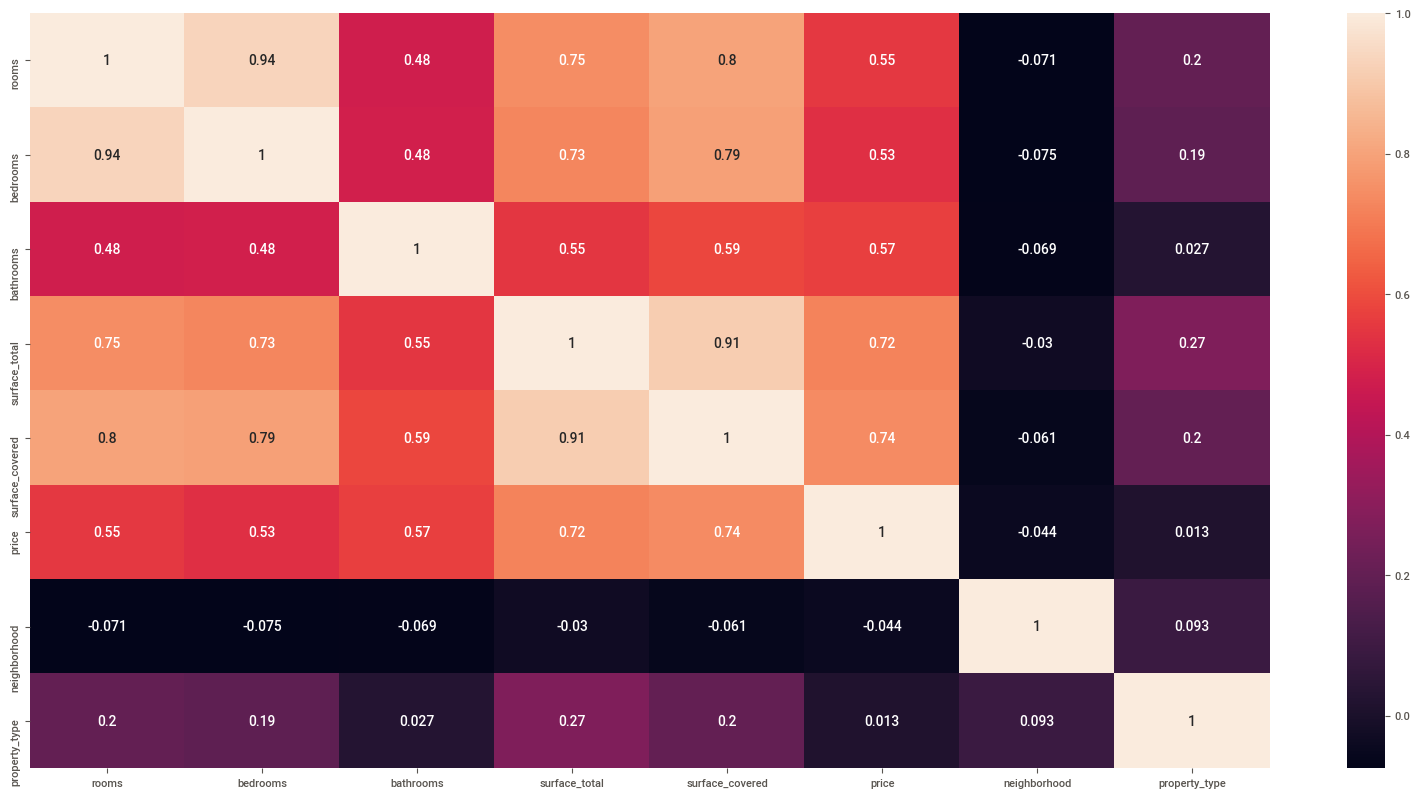

In [60]:
#Mapa de calor:

plt.figure(figsize=(20,10))
correlación = datos_properati.corr()
sns.heatmap(correlación,annot=True)
plt.show

In [61]:
#X: PRIMER INPUT POSIBLE - TRES VARIABLES PREDICTORAS (NORMALIZADAS) SEGÚN GRADO DE CORRELACIÓN CON MI VARIABLE TARGET

#Elijo surface_covered, bathrooms y rooms por sus grados de correlación con price (0.74, 0.57 y 0.55 respectivamente). 

#A su vez, descarto incluir como input a la variable surface_total, debido a su alta correlación con surface_covered (0.91), y a la variable bedrooms, a causa de su alta correlación con rooms (0.93), con el fin de evitar redundancia en mis dimensiones. 

X = X_normalizada[['bathrooms','surface_covered','rooms']]
X.shape

(67836, 3)

### 5.Generación de nuevas variables predictoras/reducción de dimensionalidad (PCA).

In [62]:
#X_PCA: SEGUNDO INPUT POSIBLE - TODAS MIS VARIABLES PREDICTORAS (NORMALIZADAS) A APLICAR REDUCCIÓN DE DIMENSIONALIDAD

X_PCA = X_normalizada
X_PCA.shape

(67836, 7)

In [63]:
#X_PCA:

pca = PCA()
pca.n_components = 7
pca_data = pca.fit_transform(X_PCA)
retention_value = pca.explained_variance_ / np.sum(pca.explained_variance_);
cumulative_retention = np.cumsum(retention_value)

Text(0, 0.5, 'Retention value')

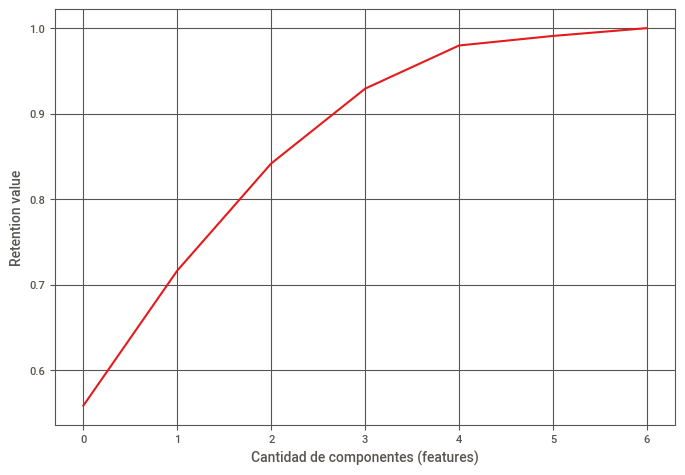

In [64]:
#X_PCA:

plt.plot(cumulative_retention)
plt.grid()
plt.xlabel('Cantidad de componentes (features)')
plt.ylabel('Retention value')

In [65]:
pca_optimizado = PCA(n_components=3)

In [66]:
X_PCA = pca_optimizado.fit_transform(X_PCA)

In [67]:
print(X_PCA.shape)

(67836, 3)


In [68]:
pca_optimizado.components_

array([[ 0.46337486,  0.46012873,  0.33725833,  0.46079794,  0.47577244,
        -0.0414137 ,  0.13933006],
       [-0.01332013, -0.02623479, -0.20282641,  0.06612367, -0.01167494,
         0.72181707,  0.65762241],
       [-0.00446167,  0.00420833,  0.28794688,  0.00144273,  0.04931269,
         0.68740912, -0.66489387]])

In [69]:
pca_optimizado.explained_variance_ratio_

array([0.55837827, 0.15801769, 0.12528746])

In [70]:
X_PCA = pd.DataFrame(X_PCA, columns=['variable_1','variable_2','variable_3'])

In [71]:
print(X_PCA.shape)
print(X_PCA.head())

(67836, 3)
   variable_1  variable_2  variable_3
0   -0.018194    0.821068   -2.041471
1   -1.281079    1.911490   -1.810316
2   -0.564379    1.998209   -1.798426
3   -0.944634    2.721956   -1.034459
4   -0.458659    2.746538   -1.005927


# MODELOS SIMPLES: 

##### _ TRABAJO CON DOS MODELOS DE ÁRBOL DE DECISIÓN CON LA MISMA PROFUNDIDAD QUE EL ÁRBOL QUE ME HABÍA DADO MEJORES RESULTADOS EN EL PROYECTO_01.

##### _ COMPARARÉ LOS RESULTADOS DEL ANTERIOR PROYECTO CON LOS DEL PROYECTO_02 (TANTO PARA FEATURES CON REDUCCIÓN DE DIMENSIONALIDAD CON PCA COMO PARA FEATURES ELEGIDAS SEGÚN UN CRITERIO DE CORRELACIÓN CON LA VARIABLE A PREDECIR).

In [72]:
#X, y:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(47485, 3) (20351, 3) (47485, 1) (20351, 1)


In [73]:
#X_PCA, y_2:

X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_PCA,y,test_size=0.30,random_state=42)
print(X_2_train.shape,X_2_test.shape,y_2_train.shape,y_2_test.shape)

(47485, 3) (20351, 3) (47485, 1) (20351, 1)


In [74]:
arbol_regresor = DecisionTreeRegressor(max_depth=12, random_state=42)

arbol_regresor_2 = DecisionTreeRegressor(max_depth=12, random_state=42)

In [75]:
arbol_regresor.fit(X_train, y_train)

arbol_regresor_2.fit(X_2_train, y_2_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [76]:
y_train_pred = arbol_regresor.predict(X_train)
y_test_pred = arbol_regresor.predict(X_test)

y_2_train_pred = arbol_regresor_2.predict(X_2_train)
y_2_test_pred = arbol_regresor_2.predict(X_2_test)

In [77]:
print('Evaluación modelo sin PCA')
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Raíz del error cuadrático medio en Train:', rmse_train)
print('Raíz del error cuadrático medio en Test:', rmse_test)
print('Evaluación modelo con PCA')
rmse_train_2 = np.sqrt(mean_squared_error(y_2_train, y_2_train_pred))
rmse_test_2 = np.sqrt(mean_squared_error(y_2_test, y_2_test_pred))
print('Raíz del error cuadrático medio en Train:', rmse_train_2)
print('Raíz del error cuadrático medio en Test:', rmse_test_2)

Evaluación modelo sin PCA
Raíz del error cuadrático medio en Train: 51502.31293855604
Raíz del error cuadrático medio en Test: 53163.06787307921
Evaluación modelo con PCA
Raíz del error cuadrático medio en Train: 35758.997027026395
Raíz del error cuadrático medio en Test: 43661.46126244194


### Chequeo que el hiperparámetro elegido sea el óptimo para el modelo que mejor resultado entregó:

In [78]:
lista_rmse_train_arbol = []
lista_rmse_test_arbol = []

max_depths = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for max_depth in max_depths:
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    clf.fit(X_2_train,y_2_train)
    
    y_train_pred = clf.predict(X_2_train)
    train_rmse = np.sqrt(mean_squared_error(y_2_train, y_train_pred))
    
    y_test_pred = clf.predict(X_2_test)
    test_rmse = np.sqrt(mean_squared_error(y_2_test, y_test_pred))
    
    lista_rmse_train_arbol.append(train_rmse)
    lista_rmse_test_arbol.append(test_rmse)

Text(0, 0.5, 'RMSE')

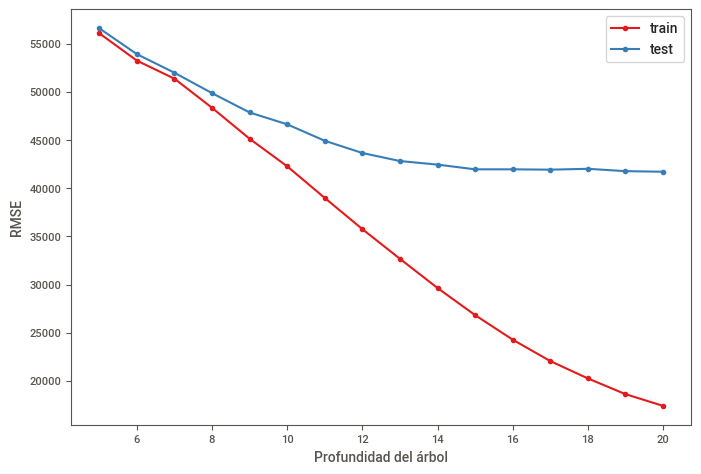

In [79]:
plt.plot(max_depths,lista_rmse_train_arbol,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test_arbol,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('RMSE')

### Métricas de evaluación del modelo óptimo del Proyecto_01 vs. el modelo simple óptimo del Proyecto_02

In [80]:
print('r2_score modelo Proyecto_01:')
print('R2 en Train: 0.7420683010775766')
print('R2 en Test: 0.667999775832037')
print('rmse modelo proyecto_01:')
print('Raíz del error cuadrático medio en Train: 130099.2627181093')
print('Raíz del error cuadrático medio en Test: 160282.26063715474')

r2_score modelo Proyecto_01:
R2 en Train: 0.7420683010775766
R2 en Test: 0.667999775832037
rmse modelo proyecto_01:
Raíz del error cuadrático medio en Train: 130099.2627181093
Raíz del error cuadrático medio en Test: 160282.26063715474


In [81]:
print('r2_score modelo proyecto_02:')
print('R2 en Train:', r2_score(y_2_train, y_2_train_pred))
print('R2 en Test:', r2_score(y_2_test, y_2_test_pred))
print('rmse modelo proyecto_02:')
print('Raíz del error cuadrático medio en Train: 35758.997027026395')
print('Raíz del error cuadrático medio en Test: 43661.46126244194')

r2_score modelo proyecto_02:
R2 en Train: 0.8314487448271948
R2 en Test: 0.7512037998403205
rmse modelo proyecto_02:
Raíz del error cuadrático medio en Train: 35758.997027026395
Raíz del error cuadrático medio en Test: 43661.46126244194


#### Conclusión PARTE A: Con los datos arrojados por las métricas de evaluación (RMSE y R2) a la vista, queda en evidencia la amplia mejora del desempeño del modelo optimizado del Proyecto_02. Esto se debe principalmente a los cinco pasos abordados en la etapa de preprocesamiento previa a la implementación del modelo. La estrategia de imputación de valores faltantes, sumado a la codificación de importantes variables categóricas y la normalización o estandarización de los datos de las columnas de input, aportaron un considerable valor agregado para un más eficiente desarrollo del modelo. A su vez, la aplicación de la reducción de dimensionalidad, a través del método del Principal Component Analysis (PCA), otorgó un mayor grado de optimización al mejor modelo conseguido en esta parte del proyecto, el árbol de decisón regresor con un máximo de profundidad de 12.

# PARTE B - Modelos Avanzados

### Clase para aplicación de modelos

In [82]:
class Modelo:
    
    def __init__(self, X, y, modelo_elegido):
        
        self.X = X
        self.y = y
        self.modelo_elegido = modelo_elegido
        
    def separación_datos(self, separación=0.30, mezcla=False, estado_aleatorio=49, polys=False, degree=3):
    
        if polys == True:
            
            poly = PolynomialFeatures(degree=degree)
            
            self.polynomials = pd.DataFrame(poly.fit_transform(self.X))
            
            X_train, X_test, y_train, y_test = train_test_split(self.polynomials, self.y, test_size=separación, shuffle=mezcla, random_state=estado_aleatorio)
        
        else:
        
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=separación, shuffle=mezcla, random_state=estado_aleatorio)
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.separación = separación
        
    def entrenar(self, hiperparámetro=1, kernel='linear', criterion='mse'):
    
        self.hiperparámetro = hiperparámetro
        self.kernel = kernel
        self.criterion = criterion
        
        if self.modelo_elegido == 'Lasso':
            self.modelo = Lasso(alpha=self.hiperparámetro)
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.modelo_elegido == 'Ridge':
            self.modelo = Ridge(alpha=self.hiperparámetro)
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.modelo_elegido == 'SVM':
            self.modelo = SVR(self.kernel, C=self.hiperparámetro)
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.modelo_elegido == 'Bosque':
            self.modelo = RandomForestRegressor(n_estimators=self.hiperparámetro, criterion=self.criterion)
            self.modelo.fit(self.X_train, self.y_train)
            self.y_train_pred = self.modelo.predict(self.X_train)
            self.y_test_pred = self.modelo.predict(self.X_test)
            
        elif self.modelo_elegido == 'Benchmark' and self.hiperparámetro==0:
            self.y_train_pred = np.full(self.y_train.shape, dataset['price'].mean())
            self.y_test_pred = np.full(self.y_test.shape, dataset['price'].mean())
            
        else:
            return None
        
        self.mse_train = mean_squared_error(self.y_train, self.y_train_pred)
        self.mse_test = mean_squared_error(self.y_test, self.y_test_pred)
        self.rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_train_pred))
        self.rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_test_pred))
        self.r2_train = r2_score(self.y_train, self.y_train_pred)
        self.r2_test = r2_score(self.y_test, self.y_test_pred)
        
    def resultados(self):
        
        print('Resultados del modelo:', self.modelo_elegido)
        
        print()
        
        print('Evaluación del modelo train:')
        
        print()
        
        print('Error cuadrático medio (MSE):', self.mse_train)
        
        print('Raíz del error cuadrático medio (RMSE):', self.rmse_train)
        
        print('R2_Score:', self.r2_train)
        
        print('Evaluación del modelo test:')
        
        print()
        
        print('Error cuadrático medio (MSE):', self.mse_test)
        
        print('Raíz del error cuadrático medio (RMSE):', self.rmse_test)
        
        print('R2_Score:', self.r2_test)
        
    def cv(self, scoring, cv=5):
        
        resultado_train = cross_val_score(self.modelo, self.X_train, self.y_train, cv=cv, scoring=scoring)
        
        resultado_test = cross_val_score(self.modelo, self.X_test, self.y_test, cv=cv, scoring=scoring)
        
        return abs(resultado_train), abs(resultado_test)
    
    def optimización(self, método, param, cv=5, n_iter=100):
        
        if método == 'Random':
            self.modelo_elegido = RandomizedSearchCV(self.modelo_elegido, param_distributions=param, n_iter=n_iter, cv=cv)
            
        elif método == 'Grid':
            self.modelo_elegido = GridSearchCV(self.modelo_elegido, param_grid=param, cv=cv)
            
        else:
            print('No hay optimización')
            
        self.modelo_elegido.fit(self.X_train, self.y_train)
        
        print('Los mejores parámetros del modelo:', self.modelo_elegido.best_params_)
        
        print('El mejor resultado del modelo:', self.modelo_elegido.best_score_)
        
        resultados = pd.DataFrame(self.modelo_elegido.cv_results_)
        
        resultados

In [83]:
#Regresión lineal con atributos polinómicos regularizada con Lasso:

Regresor_1 = Modelo(X_PCA, y, 'Lasso')

In [84]:
Regresor_1.separación_datos(separación=0.3, estado_aleatorio=42, polys=True, degree=4)

In [85]:
Regresor_1.entrenar(hiperparámetro=0.0005)

In [86]:
resultado_train_Lasso, resultado_test_Lasso = Regresor_1.cv(scoring='neg_root_mean_squared_error')
print('Resultados en train:', resultado_train_Lasso)
print('Resultado promedio:', resultado_train_Lasso.mean())
print('Resultados en test:', resultado_test_Lasso)
print('Resultado promedio:', resultado_test_Lasso.mean())

Resultados en train: [55665.41380289 56897.25383535 57201.59114731 58314.02480859
 57552.30312169]
Resultado promedio: 57126.11734316527
Resultados en test: [56572.16066211 58744.14223382 56693.73820379 55833.43599017
 74319.1962833 ]
Resultado promedio: 60432.534674639675


In [87]:
#Regresión lineal con atributos polinómicos regularizada con Ridge:

Regresor_2 = Modelo(X_PCA, y, 'Ridge')

In [88]:
Regresor_2.separación_datos(separación=0.3, estado_aleatorio=42, polys=True, degree=4)

In [89]:
Regresor_2.entrenar(hiperparámetro=0.0005)

In [90]:
resultado_train_Ridge, resultado_test_Ridge = Regresor_2.cv(scoring='neg_root_mean_squared_error')
print('Resultados en train:', resultado_train_Ridge)
print('Resultado promedio:', resultado_train_Ridge.mean())
print('Resultados en test:', resultado_test_Ridge)
print('Resultado promedio:', resultado_test_Ridge.mean())

Resultados en train: [55639.97583478 56922.17830776 57128.66774575 58291.46929974
 57528.28926606]
Resultado promedio: 57102.116090817224
Resultados en test: [56520.68741944 58792.97735097 56642.52622994 53677.45842151
 74184.63941786]
Resultado promedio: 59963.65776794429


In [91]:
#Support Vector Machines:

Regresor_3 = Modelo(X_PCA, y, 'SVM')

In [92]:
Regresor_3.separación_datos(separación=0.3, estado_aleatorio=42)

In [93]:
Regresor_3.entrenar(hiperparámetro=1, kernel='linear')

In [94]:
resultado_train_SVM, resultado_test_SVM = Regresor_3.cv(scoring='neg_root_mean_squared_error')
print('Resultados en train:', resultado_train_SVM)
print('Resultado promedio:', resultado_train_SVM.mean())
print('Resultados en test:', resultado_test_SVM)
print('Resultado promedio:', resultado_test_SVM.mean())

Resultados en train: [62449.68876702 64663.55587443 65052.95333731 66103.59045466
 65652.63840381]
Resultado promedio: 64784.48536744491
Resultados en test: [ 68510.83206276  74022.28478712  70371.66589357  63764.18096667
 100117.60396794]
Resultado promedio: 75357.31353561087


In [95]:
#Random Forest (bagging):

Regresor_4 = Modelo(X_PCA, y, 'Bosque')

In [96]:
Regresor_4.separación_datos(separación=0.3, estado_aleatorio=42)

In [97]:
Regresor_4.entrenar(hiperparámetro=200)

In [98]:
resultado_train_Bosque, resultado_test_Bosque = Regresor_4.cv(scoring='neg_root_mean_squared_error')
print('Resultados en train:', resultado_train_Bosque)
print('Resultado promedio:', resultado_train_Bosque.mean())
print('Resultados en test:', resultado_test_Bosque)
print('Resultado promedio:', resultado_test_Bosque.mean())

Resultados en train: [36534.4707848  36075.80960987 37749.84408337 38184.90509889
 36258.51857008]
Resultado promedio: 36960.70962940131
Resultados en test: [40287.77452483 41182.77017725 38293.94168355 37322.28586361
 55038.24969882]
Resultado promedio: 42425.004389614114


In [99]:
#Comparo resultados de modelos:

error_mse = {'Modelo': ['Lasso','Ridge','SVM','Random Forest'], 
             'MSE train': [resultado_train_Lasso.mean(), resultado_train_Ridge.mean(), resultado_train_SVM.mean(), resultado_train_Bosque.mean()],
            'MSE test': [resultado_test_Lasso.mean(), resultado_test_Ridge.mean(), resultado_test_SVM.mean(), resultado_test_Bosque.mean()]}

errores_modelos = pd.DataFrame(error_mse, columns=['Modelo','MSE train','MSE test'])

In [100]:
errores_modelos

,Modelo,MSE train,MSE test
0,Lasso,57126.117343,60432.534675
1,Ridge,57102.116091,59963.657768
2,SVM,64784.485367,75357.313536
3,Random Forest,36960.709629,42425.004390


In [101]:
#Modelos ordenados según error cuadrático medio en test (de menor a mayor):

errores_modelos.sort_values(by='MSE test',ignore_index=True)

,Modelo,MSE train,MSE test
0,Random Forest,36960.709629,42425.004390
1,Ridge,57102.116091,59963.657768
2,Lasso,57126.117343,60432.534675
3,SVM,64784.485367,75357.313536


((array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>),
 None,
 Text(0.5, 1.0, 'Evaluación de modelos en train'))

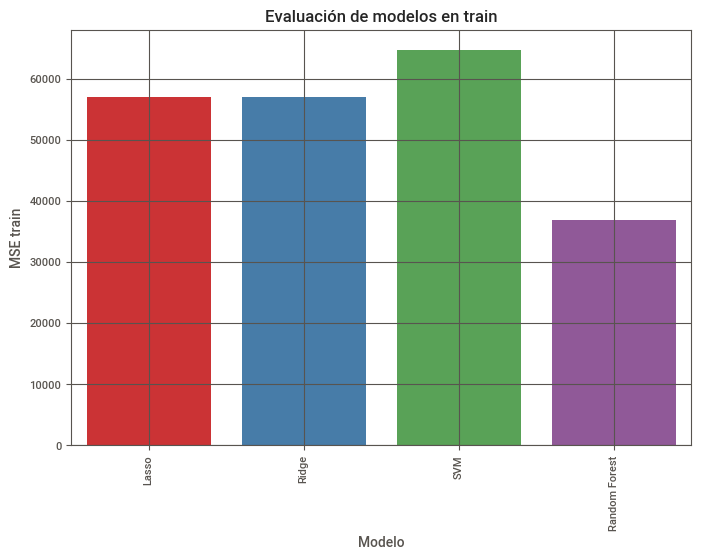

In [102]:
sns.barplot(x='Modelo',y='MSE train',data=errores_modelos)
plt.xticks(rotation=90), plt.grid('y'), plt.title('Evaluación de modelos en train')

((array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>),
 None,
 Text(0.5, 1.0, 'Evaluación de modelos en test'))

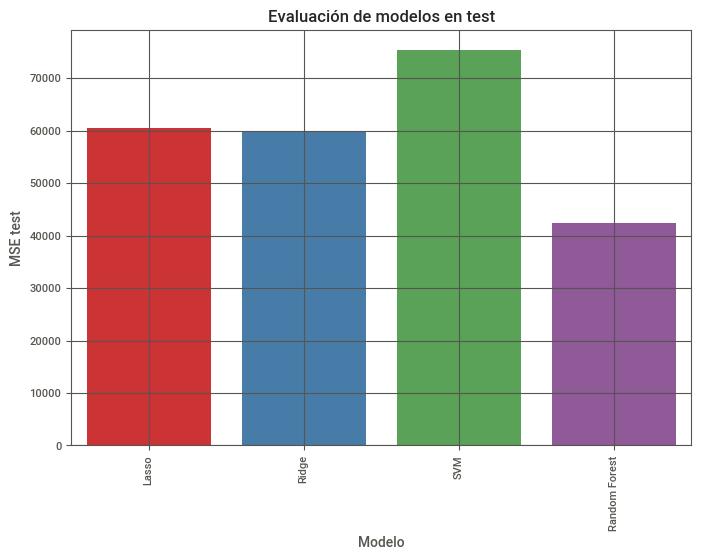

In [103]:
sns.barplot(x='Modelo',y='MSE test',data=errores_modelos)
plt.xticks(rotation=90), plt.grid('y'), plt.title('Evaluación de modelos en test')

### Optimizo los dos modelos avanzados con mejores resultados por defecto: Random Forest y Ridge

In [104]:
#Random Forest (bagging) con optimización de hiperparámetros por validación cruzada con búsqueda aleatoria:

rfr=RandomForestRegressor()

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

In [106]:
#Priorizo la optimización del hiperparámetro 'n_estimators' debido al costo computacional del proceso:

param = {'n_estimators': [150, 175, 200, 225, 250]}

In [107]:
CV_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param, n_iter=5)

In [108]:
CV_rfr.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'n_estimators': [150, 175, 200, 225,
                                                         250]})

In [109]:
CV_rfr.best_params_

{'n_estimators': 250}

In [110]:
#Ridge con optimización de hiperparámetros por validación cruzada con búsqueda aleatoria:

ridge=Ridge()

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

In [112]:
param_2 = {'alpha': np.linspace(0.0005,1.0,50),
           'solver': ['auto','svd']}

In [113]:
CV_ridge = RandomizedSearchCV(estimator=ridge, param_distributions=param_2, n_iter=10)

In [114]:
CV_ridge.fit(x_train, y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': array([5.00000000e-04, 2.08979592e-02, 4.12959184e-02, 6.16938776e-02,
       8.20918367e-02, 1.02489796e-01, 1.22887755e-01, 1.43285714e-01,
       1.63683673e-01, 1.84081633e-01, 2.04479592e-01, 2.24877551e-01,
       2.45275510e-01, 2.65673469e-01, 2.86071429e-01, 3.06469388e-01,
       3.26867347e-01, 3.47265306e-01, 3.67663...
       5.71642857e-01, 5.92040816e-01, 6.12438776e-01, 6.32836735e-01,
       6.53234694e-01, 6.73632653e-01, 6.94030612e-01, 7.14428571e-01,
       7.34826531e-01, 7.55224490e-01, 7.75622449e-01, 7.96020408e-01,
       8.16418367e-01, 8.36816327e-01, 8.57214286e-01, 8.77612245e-01,
       8.98010204e-01, 9.18408163e-01, 9.38806122e-01, 9.59204082e-01,
       9.79602041e-01, 1.00000000e+00]),
                                        'solver': ['auto', 'svd']})

In [115]:
CV_ridge.best_params_

{'solver': 'svd', 'alpha': 0.918408163265306}

In [116]:
random_forest_optimizado = RandomForestRegressor(n_estimators=150)

In [117]:
random_forest_optimizado.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150)

In [118]:
y_train_pred = random_forest_optimizado.predict(x_train)
y_test_pred = random_forest_optimizado.predict(x_test)

In [119]:
print('Evaluación modelo Random Forest optimizado')
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Raíz del error cuadrático medio en Train:', rmse_train)
print('Raíz del error cuadrático medio en Test:', rmse_test)

Evaluación modelo Random Forest optimizado
Raíz del error cuadrático medio en Train: 17655.766281469834
Raíz del error cuadrático medio en Test: 34336.518716280276


In [120]:
ridge_optimizado = Ridge(alpha=0.9796, solver='svd')

In [121]:
ridge_optimizado.fit(x_train, y_train)

Ridge(alpha=0.9796, solver='svd')

In [122]:
y_train_pred = ridge_optimizado.predict(x_train)
y_test_pred = ridge_optimizado.predict(x_test)

In [123]:
print('Evaluación modelo Ridge optimizado')
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Raíz del error cuadrático medio en Train:', rmse_train)
print('Raíz del error cuadrático medio en Test:', rmse_test)

Evaluación modelo Ridge optimizado
Raíz del error cuadrático medio en Train: 59527.66561663649
Raíz del error cuadrático medio en Test: 60017.4529703607


### Métricas de evaluación del modelo simple óptimo (Árbol de decisión) vs. el modelo avanzado óptimo (Random Forest) del Proyecto_02

In [124]:
print('rmse modelo simple proyecto_02:')
print('Raíz del error cuadrático medio en Train: 35758.997027026395')
print('Raíz del error cuadrático medio en Test: 43661.46126244194')

rmse modelo simple proyecto_02:
Raíz del error cuadrático medio en Train: 35758.997027026395
Raíz del error cuadrático medio en Test: 43661.46126244194


In [125]:
print('rmse modelo avanzado proyecto_02:')
print('Raíz del error cuadrático medio en Train: 17659.36401496392')
print('Raíz del error cuadrático medio en Test: 34388.257546668574')

rmse modelo avanzado proyecto_02:
Raíz del error cuadrático medio en Train: 17659.36401496392
Raíz del error cuadrático medio en Test: 34388.257546668574


#### Conclusión PARTE B: en la comparación entre modelos avanzados con hiperparámetros con valores por defecto, entre regresión lineal con atributos polinómicos con regularización por Lasso y por Ridge, Support Vector Regressor y Random Forest, este último fue el algoritmo que mostró mejores métricas de evaluación una vez entrenado. Al ser optimizado a través de una validación cruzada con búsqueda aleatoria, se comprobó que un número de árboles estimadores (hiperparámetro) menor, daría un mejor resultado en Test. No obstante, se percibe una cosiderable brecha entre el RMSE conseguido con la porción de prueba y la de entrenamiento. Por lo tanto, se concluye en que la mejor decisión sería optar por el primero Random Forest entrenado, con un resultado promedio en Test de 42466.59957664042.

In [126]:
Regresor_4.resultados()

Resultados del modelo: Bosque

Evaluación del modelo train:

Error cuadrático medio (MSE): 326802343.5686908
Raíz del error cuadrático medio (RMSE): 18077.67528109438
R2_Score: 0.9561157747445795
Evaluación del modelo test:

Error cuadrático medio (MSE): 1141840637.2089825
Raíz del error cuadrático medio (RMSE): 33791.132523326036
R2_Score: 0.8568751953559596


# PARTE C - Interpretación de modelos

In [127]:
último_modelo = RandomForestRegressor(n_estimators=200)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

In [129]:
último_modelo.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [130]:
y_train_pred = último_modelo.predict(x_train)
y_test_pred = último_modelo.predict(x_test)

In [131]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [132]:
print('Raíz del error cuadrático medio en Train:', rmse_train)
print('Raíz del erro cuadrático medio en Test:', rmse_test)

Raíz del error cuadrático medio en Train: 17613.234605711677
Raíz del erro cuadrático medio en Test: 34399.80565814751


In [133]:
último_modelo.base_estimator_

DecisionTreeRegressor()

In [134]:
último_modelo.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=2081749027),
 DecisionTreeRegressor(max_features='auto', random_state=1589211441),
 DecisionTreeRegressor(max_features='auto', random_state=1176579617),
 DecisionTreeRegressor(max_features='auto', random_state=2147172733),
 DecisionTreeRegressor(max_features='auto', random_state=844643754),
 DecisionTreeRegressor(max_features='auto', random_state=1454972526),
 DecisionTreeRegressor(max_features='auto', random_state=1455859425),
 DecisionTreeRegressor(max_features='auto', random_state=1749888612),
 DecisionTreeRegressor(max_features='auto', random_state=306291773),
 DecisionTreeRegressor(max_features='auto', random_state=163114426),
 DecisionTreeRegressor(max_features='auto', random_state=856650214),
 DecisionTreeRegressor(max_features='auto', random_state=584161867),
 DecisionTreeRegressor(max_features='auto', random_state=322382463),
 DecisionTreeRegressor(max_features='auto', random_state=1195092870),
 DecisionTreeRegressor(max

In [135]:
X_PCA.sample(10)

,variable_1,variable_2,variable_3
44314,1.444992,-1.381067,-0.292860
11790,0.811810,0.017224,0.220399
21046,-1.289298,-0.921096,-0.720504
21189,4.830817,1.808726,-0.921669
3629,1.403703,-0.845539,0.203610
18441,-1.578026,-0.927049,-0.742631
26365,-0.337174,-0.921060,-0.688037
26105,0.252598,-0.919448,-0.704904
4689,-0.662796,-0.856580,-0.618831
19192,0.214694,0.777585,0.943171


In [136]:
#La importancia de mis tres features ('variable_1', 'variable_2' y 'variable_3') al momento de la predicción de mi target ('price')

último_modelo.feature_importances_

array([0.61145092, 0.15399552, 0.23455356])

## Se observa como, tras haber aplicado una reducción de dimensionalidad (PCA), la columna 'variable_1' representa el mayor peso al momento de inferir el output, ya que su trascendencia o peso en el algoritmo supera ampliamente incluso al resto de las columnas ('variable_2' y 'variable_3') sumadas entre sí. 

#### A continuación, la distribución de los errores en Train y Test:

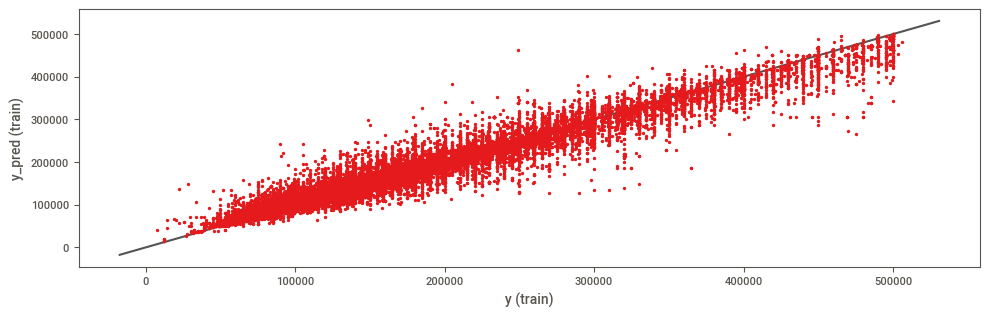

In [137]:
plt.figure(figsize = (10,6))

ax= plt.subplot(2,1,1)
ax.scatter(y_train,y_train_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (train)')
plt.ylabel('y_pred (train)')
    
plt.tight_layout()
plt.show()

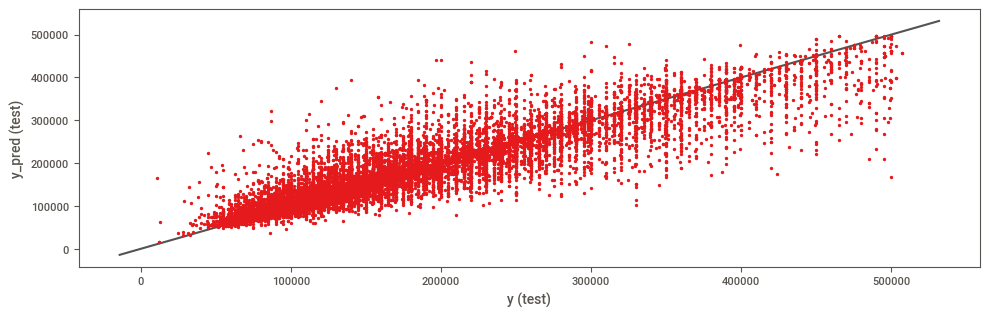

In [138]:
plt.figure(figsize = (10,6))

ax= plt.subplot(2,1,1)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [139]:
for i in último_modelo.estimators_:
    ejemplos = i.feature_importances_
    print(ejemplos)

[0.61518328 0.15861133 0.22620539]
[0.61257144 0.15910213 0.22832643]
[0.61405628 0.15343997 0.23250376]
[0.61071097 0.14743089 0.24185814]
[0.60914738 0.1587557  0.23209692]
[0.60696842 0.1599363  0.23309529]
[0.61645795 0.1431433  0.24039875]
[0.61277595 0.15883417 0.22838988]
[0.60904946 0.15459583 0.23635471]
[0.61620901 0.14943817 0.23435282]
[0.61934881 0.15786715 0.22278404]
[0.60970609 0.16178103 0.22851288]
[0.61756629 0.1527868  0.22964691]
[0.61912143 0.15163994 0.22923863]
[0.60756826 0.15354156 0.23889018]
[0.6053784  0.16241912 0.23220249]
[0.6124112  0.14323594 0.24435286]
[0.62308482 0.14793739 0.22897779]
[0.61893743 0.14941479 0.23164779]
[0.61829433 0.15185074 0.22985493]
[0.61467424 0.15657398 0.22875178]
[0.59921782 0.15797196 0.24281021]
[0.61106815 0.15971126 0.22922059]
[0.59789457 0.16689565 0.23520978]
[0.60752952 0.18252343 0.20994704]
[0.60830606 0.15463966 0.23705428]
[0.61464029 0.14797501 0.2373847 ]
[0.61580363 0.15407684 0.23011953]
[0.61462062 0.151289

### La distribución de errores presenta una tendencia a incrementarse a medida que el valor de "y" aumenta y las muestras en consideración disminuyen. Por otro lado, al corroborar el atributo de importancia de features en el total de los árboles estimadores, se detecta una continuidad de la 'variable_1' como el input de mayor peso al momento de la predicción del modelo. Por último, vale remarcar que se logró reducir de manera drástica el nivel de error del modelo (RMSE) en comparación con el modelo simple de TreeRegressor expuesto en la parte A.

### Para agregar, se percibe un dataset desbalanceado en algunas de sus variables preponderantes. Tal es el caso de tipos de propiedad, teniendo en cuenta que existen cinco veces más datos sobre departamentos que sobre casas, siendo estos los dos tipo de propiedad más repetidos en el conjunto de datos analizado. Algo similar ocurre con la columna de regiones: Capital Federal es la más veces repetidas, y las otras tres regiones detectadas en el dataset -sumando todas sus instancias- ni siquiera alcanzan la mitad de los datos de Capital Federal. Creo que se podría llegar a modelos de aprendizaje automático más eficaces al aplicar uno por cada uno de los tres tipos de propiedad más repetidos (departamento, casa y PH) en la región de Capital Federal. También podrían ser investigados los datos sobre el resto de las regiones en conjunto, habida cuenta de que todas pertenecen a la provincia de Buenos Aires. De esa forma, podría compararse el nivel de precios entre los dos distritos más poblados de Argentina: CABA y BS. AS..